Exploratory Data Analysis (EDA) on Iris Dataset

In [2]:
# Import essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [4]:
# Download and load the Iris dataset into a pandas DataFrame
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
iris = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(iris.head(7))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa


In [5]:
# Number of data points in dataset
num_data_points = iris.shape[0]
print("Number of data points:", num_data_points)

# Number of features (excluding the target/label column)
num_features = iris.shape[1] - 1
print("Number of features:", num_features)

Number of data points: 150
Number of features: 4


In [6]:
# column names in our dataset
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [7]:
# data points for each class 
# flowers for each species 

iris["species"].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# 2-D Scatter Plot

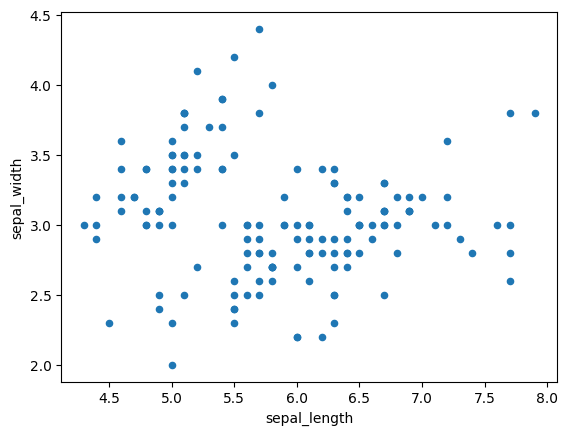

In [8]:
iris.plot(kind='scatter', x='Sepal_length', y='Sepal_width')
plt.show()

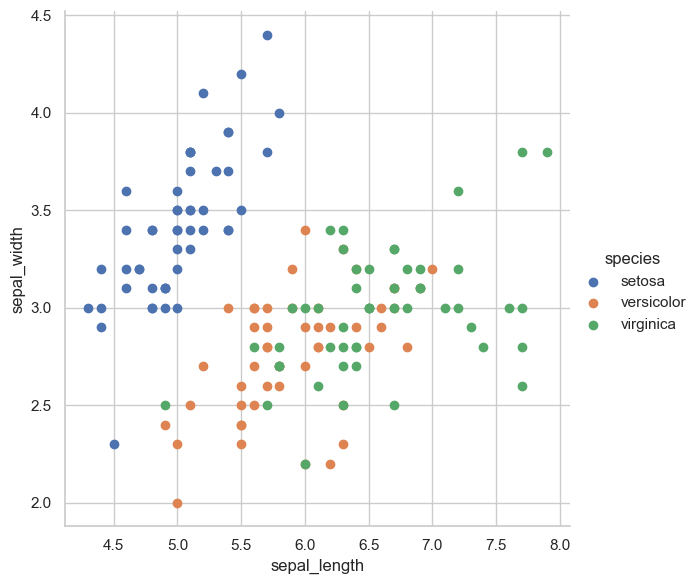

In [9]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a FacetGrid object and map a scatter plot onto it
facet_grid = sns.FacetGrid(iris, hue="species", height=6)
facet_grid.map(plt.scatter, "sepal_length", "sepal_width").add_legend()

# Display the plot
plt.show()

# 3-D Scatter Plot

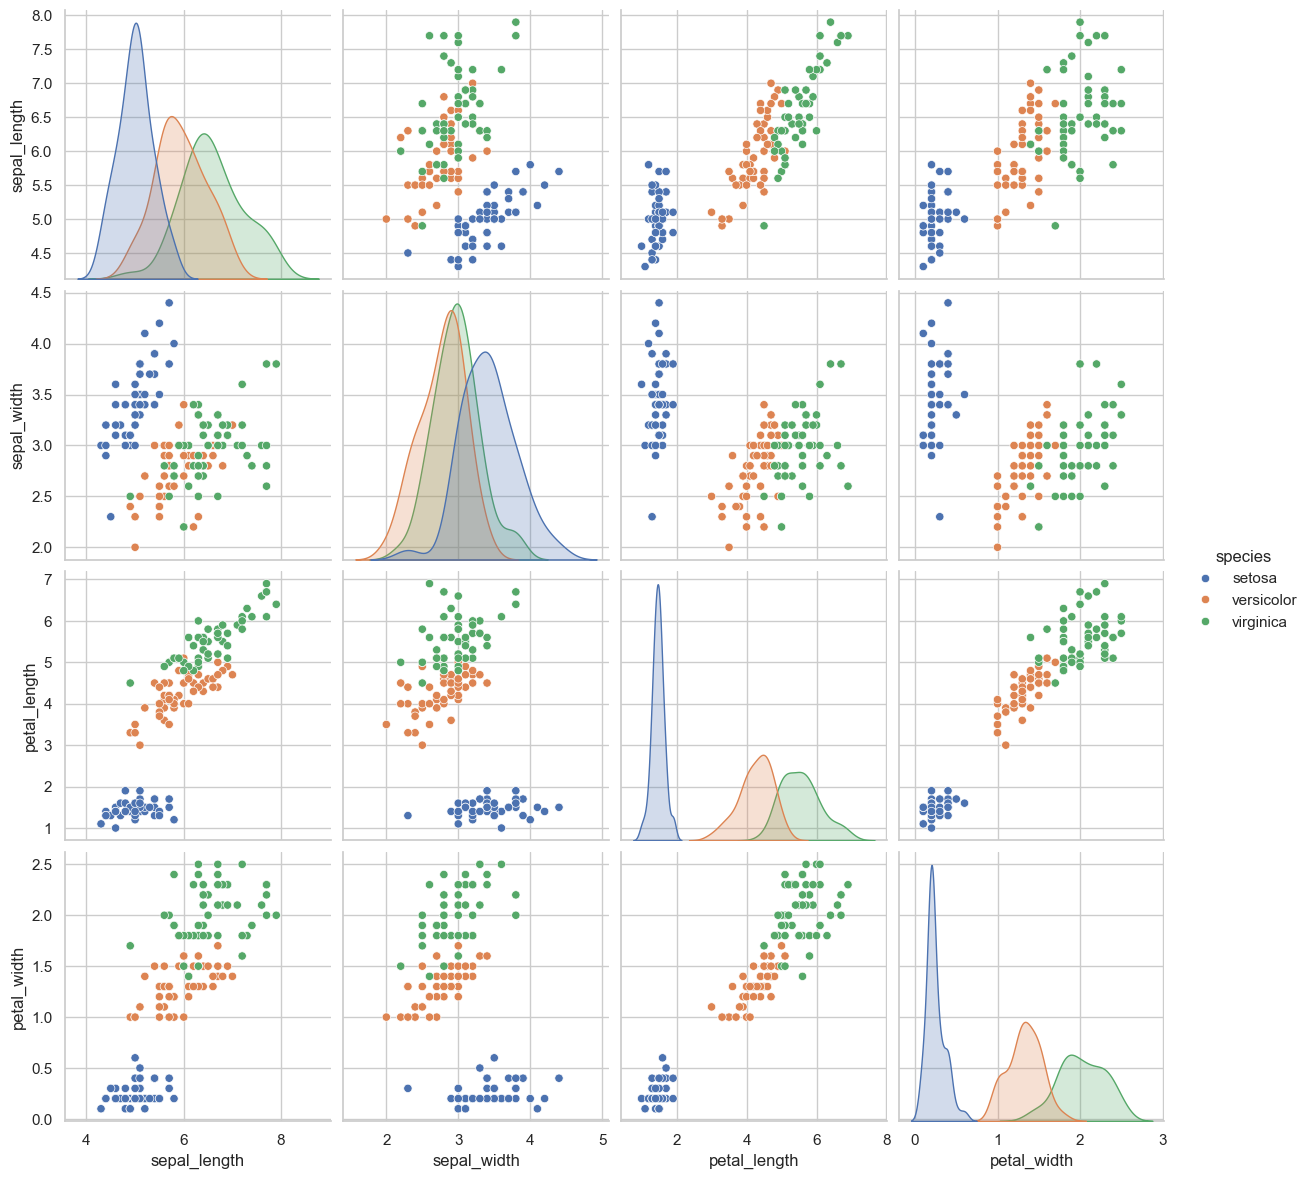

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()

# Histogram_PDF_CDF

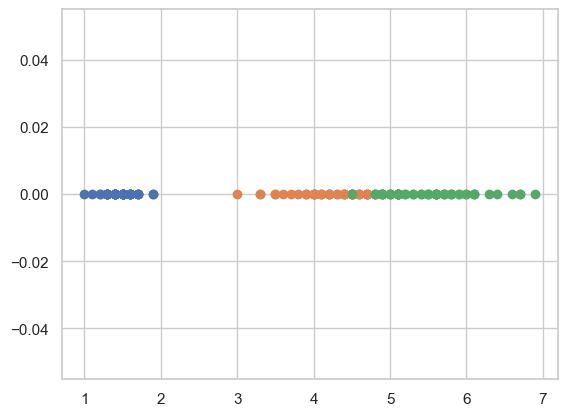

In [12]:
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()

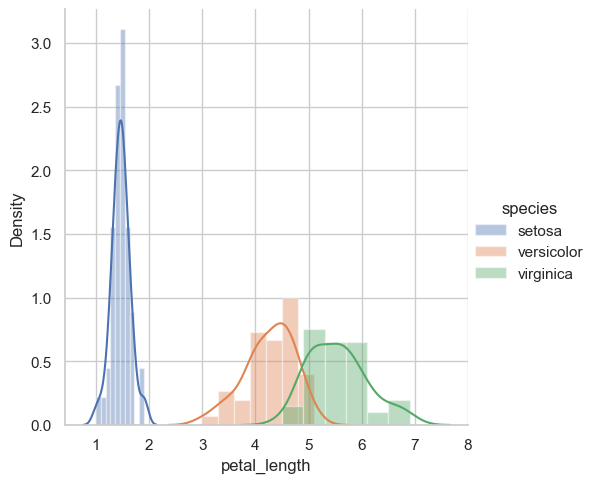

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid using seaborn without the 'size' parameter
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "petal_length").add_legend()
plt.show()


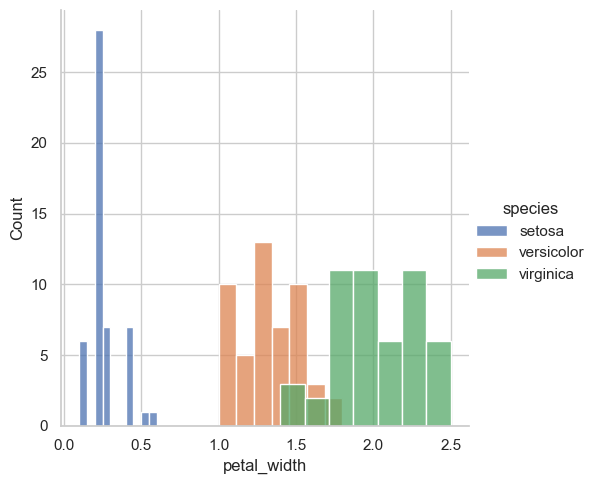

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid using seaborn with 'height' instead of 'size'
sns.FacetGrid(iris, hue="species", height=5).map(sns.histplot, "petal_width").add_legend()
plt.show()


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


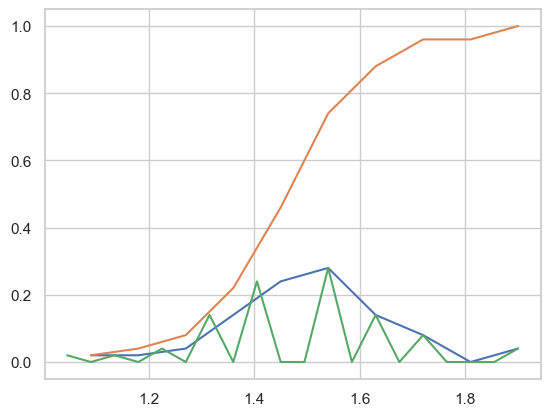

In [18]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

# Mean_Variance_StdDeviation

In [20]:
# Calculate mean
print("Mean:")
print("Setosa mean petal length:", np.mean(iris_setosa["petal_length"]))
print("Setosa mean petal length with outlier:", np.mean(np.append(iris_setosa["petal_length"], 50)))
print("Virginica mean petal length:", np.mean(iris_virginica["petal_length"]))
print("Versicolor mean petal length:", np.mean(iris_versicolor["petal_length"]))

# Calculate standard deviations
print("\nStd-deviations:")
print("Setosa std-dev petal length:", np.std(iris_setosa["petal_length"]))
print("Virginica std-dev petal length:", np.std(iris_virginica["petal_length"]))
print("Versicolor std-dev petal length:", np.std(iris_versicolor["petal_length"]))

Mean:
Setosa mean petal length: 1.464
Setosa mean petal length with outlier: 2.4156862745098038
Virginica mean petal length: 5.5520000000000005
Versicolor mean petal length: 4.26

Std-deviations:
Setosa std-dev petal length: 0.17176728442867112
Virginica std-dev petal length: 0.546347874526844
Versicolor std-dev petal length: 0.4651881339845203


# Median_Percentile_Quantile_IQR_MAD

In [22]:

from statsmodels import robust

# Print medians
print("\nMedians:")
print("Setosa median petal length:", np.median(iris_setosa["petal_length"]))
print("Setosa median petal length with outlier:", np.median(np.append(iris_setosa["petal_length"], 50)))
print("Virginica median petal length:", np.median(iris_virginica["petal_length"]))
print("Versicolor median petal length:", np.median(iris_versicolor["petal_length"]))

# Print quantiles
print("\nQuantiles:")
print("Setosa quantiles (0th, 25th, 50th, 75th):", np.percentile(iris_setosa["petal_length"], np.arange(0, 100, 25)))
print("Virginica quantiles (0th, 25th, 50th, 75th):", np.percentile(iris_virginica["petal_length"], np.arange(0, 100, 25)))
print("Versicolor quantiles (0th, 25th, 50th, 75th):", np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

# Print 90th percentiles
print("\n90th Percentiles:")
print("Setosa 90th percentile:", np.percentile(iris_setosa["petal_length"], 90))
print("Virginica 90th percentile:", np.percentile(iris_virginica["petal_length"], 90))
print("Versicolor 90th percentile:", np.percentile(iris_versicolor["petal_length"], 90))

# Print median absolute deviations
print("\nMedian Absolute Deviation:")
print("Setosa MAD:", robust.mad(iris_setosa["petal_length"]))
print("Virginica MAD:", robust.mad(iris_virginica["petal_length"]))
print("Versicolor MAD:", robust.mad(iris_versicolor["petal_length"]))



Medians:
Setosa median petal length: 1.5
Setosa median petal length with outlier: 1.5
Virginica median petal length: 5.55
Versicolor median petal length: 4.35

Quantiles:
Setosa quantiles (0th, 25th, 50th, 75th): [1.    1.4   1.5   1.575]
Virginica quantiles (0th, 25th, 50th, 75th): [4.5   5.1   5.55  5.875]
Versicolor quantiles (0th, 25th, 50th, 75th): [3.   4.   4.35 4.6 ]

90th Percentiles:
Setosa 90th percentile: 1.7
Virginica 90th percentile: 6.31
Versicolor 90th percentile: 4.8

Median Absolute Deviation:
Setosa MAD: 0.14826022185056031
Virginica MAD: 0.6671709983275211
Versicolor MAD: 0.5189107764769602


# Box plot and Whiskers

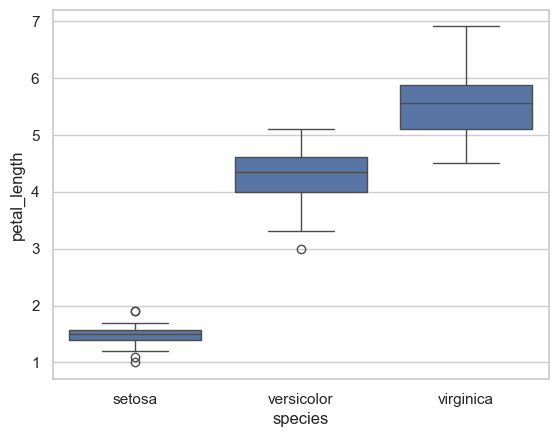

In [23]:
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# Multivariate probability density, contour plot

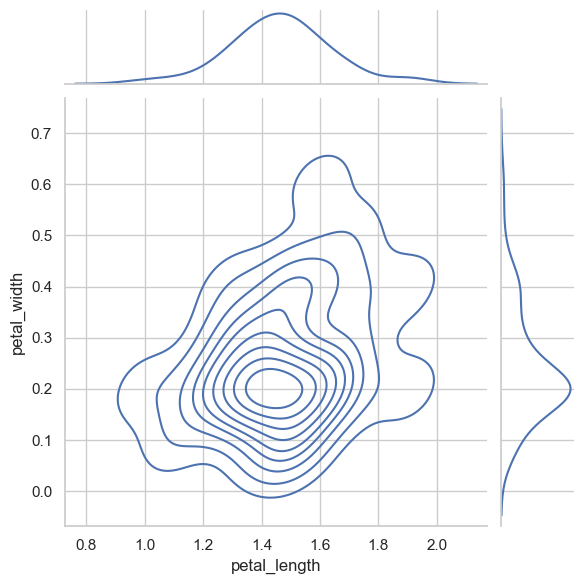

In [24]:
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();